In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('train_pronto.csv')

In [3]:
df.head()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekend,afternoon,morning,evening,night,cat_weekend,cat_weekday
0,0,20.2900,22.2900,0.00,439.00,0.003275,0,weekday,1,0,0,0,0,1
1,1,21.9725,30.0725,419.00,975.25,0.004912,1,weekday,1,0,0,0,0,1
2,2,21.1500,19.5500,0.00,497.00,0.003028,0,weekday,0,0,1,0,0,1
3,3,22.2000,34.1725,433.00,1682.75,0.005667,1,weekday,1,0,0,0,0,1
4,4,24.1000,24.1000,181.75,681.25,0.004475,0,weekday,1,0,0,0,0,1


In [4]:
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)

In [5]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## KNN

In [6]:
%%time
parameters = {'n_neighbors': np.arange(1, 50 + 1), 'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], }

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

Wall time: 15min 14s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
clf = search.best_estimator_

In [8]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [9]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9888551165146909
F1-score [0.9927162  0.97628288]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      0.99      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



In [10]:
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.9897 (+/- 0.002)
F1-score: 0.9858 (+/- 0.002)


In [11]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,afternoon,morning,evening,night,cat_weekend,cat_weekday
0,20.2900,22.2900,0.00,439.00,0.003275,0,1,0,0,0,0,1
1,21.9725,30.0725,419.00,975.25,0.004912,1,1,0,0,0,0,1
2,21.1500,19.5500,0.00,497.00,0.003028,0,0,0,1,0,0,1
3,22.2000,34.1725,433.00,1682.75,0.005667,1,1,0,0,0,0,1
4,24.1000,24.1000,181.75,681.25,0.004475,0,1,0,0,0,0,1


In [12]:
df[['Temperature', 'Humidity']]

,Temperature,Humidity
0,20.2900,22.2900
1,21.9725,30.0725
2,21.1500,19.5500
3,22.2000,34.1725
4,24.1000,24.1000
...,...,...
16443,20.3900,26.8900
16444,23.6000,27.2900
16445,20.0000,18.8900
16446,20.3400,31.5000


In [13]:
'''%%time
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 13
# import some data to play with


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = df[['Light', 'Temperature']]
y = df.Occupancy

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.Light.min() - 1, X.Light.max() + 1
    y_min, y_max = X.Temperature.min() - 1, X.Temperature.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()'''

'%%time\nfrom sklearn import datasets\nfrom matplotlib.colors import ListedColormap\n\nn_neighbors = 13\n# import some data to play with\n\n\n# we only take the first two features. We could avoid this ugly\n# slicing by using a two-dim dataset\nX = df[[\'Light\', \'Temperature\']]\ny = df.Occupancy\n\nh = .02  # step size in the mesh\n\n# Create color maps\ncmap_light = ListedColormap([\'orange\', \'cyan\', \'cornflowerblue\'])\ncmap_bold = ListedColormap([\'darkorange\', \'c\', \'darkblue\'])\n\nfor weights in [\'uniform\', \'distance\']:\n    # we create an instance of Neighbours Classifier and fit the data.\n    clf.fit(X, y)\n\n    # Plot the decision boundary. For that, we will assign a color to each\n    # point in the mesh [x_min, x_max]x[y_min, y_max].\n    x_min, x_max = X.Light.min() - 1, X.Light.max() + 1\n    y_min, y_max = X.Temperature.min() - 1, X.Temperature.max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                         np.arange(y_min, y_max,

## ROC CURVE

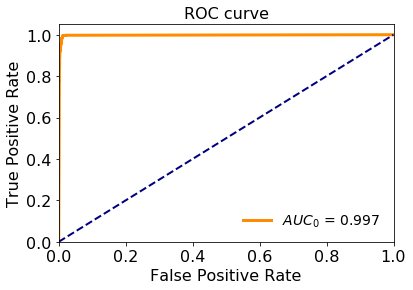

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## LIFT CHART

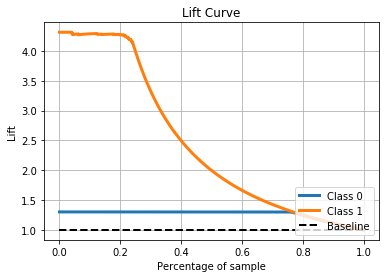

In [15]:
from scikitplot.metrics import plot_lift_curve
plot_lift_curve(y_test, y_score)
plt.show()

In [16]:

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9888551165146909
F1-score [0.9927162  0.97628288]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      0.99      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



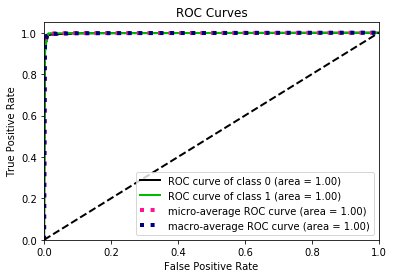

In [17]:
plot_roc(y_test, y_score)
plt.show()


## NAIVE BAYES

In [18]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [19]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9335359675785208
F1-score [0.95478357 0.87461774]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3791
           1       0.78      1.00      0.87      1144

    accuracy                           0.93      4935
   macro avg       0.89      0.96      0.91      4935
weighted avg       0.95      0.93      0.94      4935



In [22]:
X_train_num, X_test_num, y_train, y_test = train_test_split(
    df[[c for c in df.columns if c != class_name]], df[class_name], 
       test_size=0.3, random_state=100, stratify=df[class_name])

In [23]:
clf = GaussianNB()
clf.fit(X_train_num, y_train)
y_pred = clf.predict(X_test_num)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9335359675785208
F1-score [0.95478357 0.87461774]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3791
           1       0.78      1.00      0.87      1144

    accuracy                           0.93      4935
   macro avg       0.89      0.96      0.91      4935
weighted avg       0.95      0.93      0.94      4935



## ROC CURVE

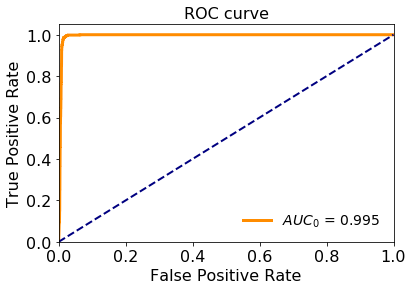

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## LIFT CHART

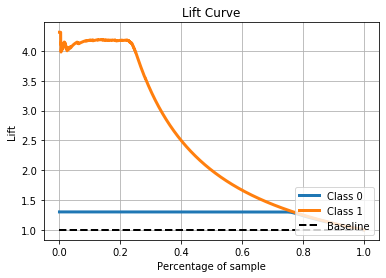

In [25]:
plot_lift_curve(y_test, y_score)
plt.show()

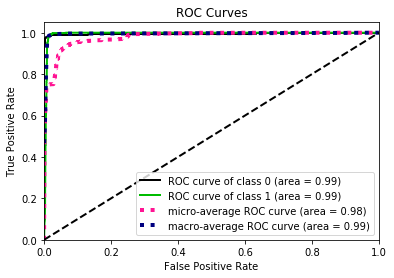

In [26]:
plot_roc(y_test, y_score)
plt.show()
